<a href="https://colab.research.google.com/github/Devraaz/Machine-Learning-Models/blob/main/Bagging_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging Ensemble - Bootstrapping + Aggregation

 Bagging stands for Bootstrap Aggregating. It’s an ensemble technique — which means it combines multiple models to improve performance.*


📦 How Does Bagging Classifier Work?
- Multiple Models: It creates several copies of the training data by random sampling with replacement (this is called bootstrapping).

- Train Models: A separate model (usually Decision Trees) is trained on each bootstrapped dataset.

- Voting: For classification, each model gives a prediction, and the majority vote decides the final output.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

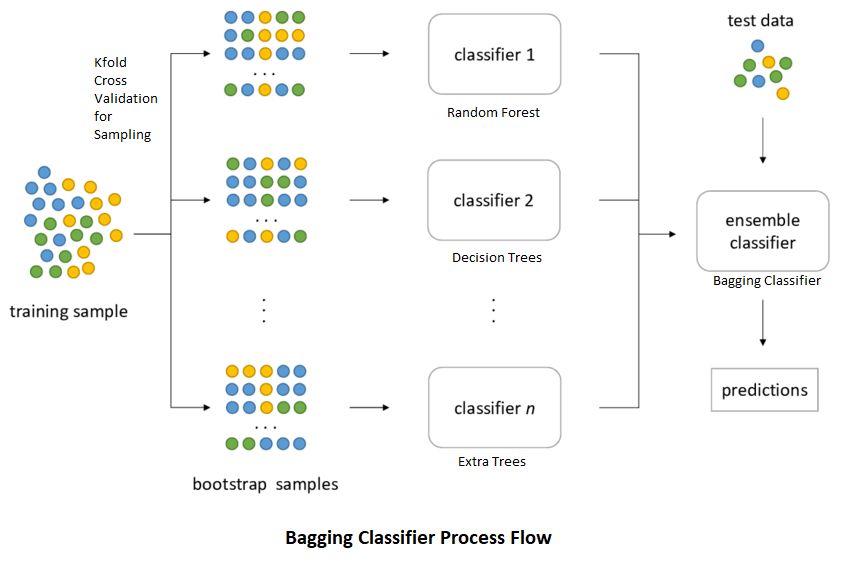

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
X, y = make_classification(n_samples=10000, n_features=10, n_informative=3)

In [ ]:
y.shape

(10000,)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2, random_state=2)

In [ ]:
dt = DecisionTreeClassifier(random_state=2)
dt.fit(X_train, Y_train)
X_pred = dt.predict(X_test)


print("Decision Tree Accuuracy: ", accuracy_score(X_pred, Y_test))

Decision Tree Accuuracy:  0.888


## Bagging

In [ ]:
bag = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators = 500,
    max_samples = 0.25,
    bootstrap = True,
    random_state = 2
)

In [ ]:
bag.fit(X_train, Y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, random_state=2)

In [ ]:
y_pred = bag.predict(X_test)

In [ ]:
accuracy_score(Y_test, y_pred)

0.924

The below code will show which rows are being selected for sub-sets of data,

In [ ]:
bag.estimators_samples_   #[0]  , [0][0], [1]shape

np.int64(5939)

In [ ]:
bag.estimators_features_

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),


## OOB Score

🧺 What is OOB (Out-of-Bag) Data?
When using bagging, each model is trained on a random subset of the data created using bootstrap sampling (with replacement).

- This means that some samples are used multiple times in the training set.

- But as a result, about 1/3 of the data is left out from the training of each individual model.

- These left-out samples are called Out-of-Bag (OOB) samples.

In [ ]:
bag2 = BaggingClassifier(
    estimator = DecisionTreeClassifier(),   # Type of classifer used
    n_estimators=500,    # So a total of 500 Decision Tree will be create
    max_samples = 0.25,   # Each decision tree will have a 25% of total data
    bootstrap = True,   # With replacement - Every data will be replaced
    random_state = 2,  #
    oob_score=True    # It is said that out of al the data only 2/3 is used the rest 1/3 is not
                      # used properly so we will be using this data as testing purposes
)

In [ ]:
bag.fit(X_train, Y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, random_state=2)

In [ ]:
y_pred = bag.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, y_pred))

Accuracy:  0.924


### Applying GridSearchCV

GridSearchCV stands for Grid Search with Cross-Validation.

It is used to find the best combination of hyperparameters for your model by:

- Trying all possible combinations from a predefined grid of hyperparameters.

- Evaluating each combination using cross-validation.

- Choosing the combination that gives the best performance.



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'n_estimators': [50, 100, 500],
    'max_samples' : [0.1, 0.4, 0.7, 1.0],
    'bootstrap': [True, False],
    'max_features': [0.1, 0.4,0.7, 1.0,]
}

In [ ]:
search = GridSearchCV(BaggingClassifier(), parameters, cv = 5)

In [ ]:
# search.fit(X_train, Y_train)      # Ts taking a very long time

# Regression Model

In [ ]:
house_df = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [ ]:
house_df.shape

(17000, 9)

In [ ]:
X = house_df.drop(columns = ['median_house_value', 'longitude', 'latitude', 'population'])
y = house_df['median_house_value']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
stdsc = StandardScaler()
house_scaled  = stdsc.fit_transform(X)


# Convert back to DataFrame with original column names
X = pd.DataFrame(house_scaled, columns=X.columns)

X.head()  # ✅ Now this works

,housing_median_age,total_rooms,total_bedrooms,households,median_income
0,-1.079671,1.361695,1.764204,-0.075998,-1.252543
1,-0.761872,2.296608,3.230441,-0.099404,-1.081483
2,-0.920772,-0.882462,-0.866956,-0.999252,-1.170105
3,-1.159121,-0.524186,-0.480230,-0.715774,-0.362600
4,-0.682422,-0.545747,-0.506328,-0.622148,-1.026454


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, train_size=0.8, random_state=3)
print("The Test sizes are: ", X_train.shape, X_test.shape)

The Test sizes are:  (13600, 5) (3400, 5)


In [ ]:
lr =LinearRegression()
dt =DecisionTreeRegressor()
knn = KNeighborsRegressor()


In [ ]:
lr.fit(X_train, Y_train)
dt.fit(X_train, Y_train)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
knn_pred = knn.predict(X_test)

In [ ]:
print("LR Accuracy Score: ", r2_score(lr_pred, Y_test))
print("DT Accuracy Score: ", r2_score(dt_pred, Y_test))
print("KNN Accuracy Score: ", r2_score(knn_pred, Y_test))

LR Accuracy Score:  0.197444362781947
DT Accuracy Score:  0.3027107190644035
KNN Accuracy Score:  0.36251080719648876


In [ ]:
from sklearn.ensemble import BaggingRegressor
bag_regressor = BaggingRegressor()
bag_regressor.fit(X_train, Y_train)


BaggingRegressor()

In [ ]:
y_bag_pred = bag_regressor.predict(X_test)

print("Training coefficent of r2: %.2f"%bag_regressor.score(X_train, Y_train))
print("Test coefficent of r2: %.2f"%bag_regressor.score(X_test, Y_test))

Training coefficent of r2: 0.93
Test coefficent of r2: 0.57


You can see fo rthis dataset it is giving an r2 score of 57% which is far much better than the r2 score of KNN that is 36%